In [1]:
import numpy as np
import cv2
#from skimage.io import imread
from scipy.misc import imread
from keras.models import load_model
model = load_model('branch_model_mnist.h5')


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Model)              (None, 16, 28, 28)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 14, 14)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 14, 14)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 403,274
Trainable params: 403,274
Non-trainable params: 0
_________________________________________________________________


In [3]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

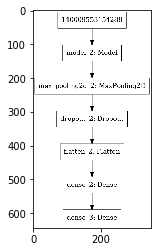

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('model.png')
plt.imshow(img)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


AxesImage(54,36;334.8x217.44)
predicted digit: 1


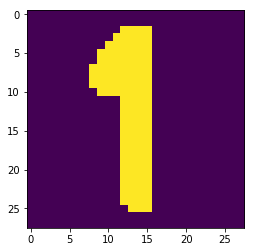

In [9]:
imag="1.PNG"

image = imread(imag).astype(float)
img=mpimg.imread(imag)
print(plt.imshow(img))
# normalise it in the same manner as we did for the training data
image = image / 255.0

#reshape
image = image.reshape(1,1,28,28)

# forward propagate and print index of most likely class 
# (for MNIST this corresponds one-to-one with the digit)
print("predicted digit: "+str(model.predict_classes(image)[0]))